In [1]:
import pandas as pd
import numpy as np

### 파일 불러오기

In [2]:
data = pd.read_excel("data/data_weather.xlsx")
data.head()

,타임스탬프,귀하의 성별은 무엇입니까?,귀하의 연령대는 무엇입니까?,귀하의 거주 지역은 어디입니까?,오늘 기분은 어떠십니까?,1순위 음식 분야,2순위 음식 분야,3순위 음식 분야,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온(°C),강수량(mm),습도(%),현지기압(hPa),전운량(10분위)
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   타임스탬프              385 non-null    object 
 1   귀하의 성별은 무엇입니까?     385 non-null    object 
 2   귀하의 연령대는 무엇입니까?    385 non-null    object 
 3   귀하의 거주 지역은 어디입니까?  385 non-null    object 
 4   오늘 기분은 어떠십니까?      385 non-null    object 
 5   1순위 음식 분야          385 non-null    object 
 6   2순위 음식 분야          385 non-null    object 
 7   3순위 음식 분야          385 non-null    object 
 8   1_한식               173 non-null    object 
 9   2_한식               93 non-null     object 
 10  3_한식               75 non-null     object 
 11  1_분식               34 non-null     object 
 12  2_분식               39 non-null     object 
 13  3_분식               62 non-null     object 
 14  1_양식               76 non-null     object 
 15  2_양식               76 non-null     object 
 16  3_양식               86 non-

# 전처리

In [4]:
# 결측치 확인
data.isnull().sum()

타임스탬프                  0
귀하의 성별은 무엇입니까?         0
귀하의 연령대는 무엇입니까?        0
귀하의 거주 지역은 어디입니까?      0
오늘 기분은 어떠십니까?          0
1순위 음식 분야              0
2순위 음식 분야              0
3순위 음식 분야              0
1_한식                 212
2_한식                 292
3_한식                 310
1_분식                 351
2_분식                 346
3_분식                 323
1_양식                 309
2_양식                 309
3_양식                 299
1_일식                 308
2_일식                 275
3_일식                 296
1_중식                 360
2_중식                 318
3_중식                 312
기온(°C)                 0
강수량(mm)                0
습도(%)                  0
현지기압(hPa)              0
전운량(10분위)              0
dtype: int64

### 컬럼명 변경

In [5]:
data.columns

Index(['타임스탬프', '귀하의 성별은 무엇입니까?', '귀하의 연령대는 무엇입니까?', '귀하의 거주 지역은 어디입니까?',
       '오늘 기분은 어떠십니까?', '1순위 음식 분야', '2순위 음식 분야', '3순위 음식 분야', '1_한식', '2_한식',
       '3_한식', '1_분식', '2_분식', '3_분식', '1_양식', '2_양식', '3_양식', '1_일식', '2_일식',
       '3_일식', '1_중식', '2_중식', '3_중식', '기온(°C)', '강수량(mm)', '습도(%)',
       '현지기압(hPa)', '전운량(10분위)'],
      dtype='object')

In [6]:
data.rename(columns={'타임스탬프':'시간대',
                     '귀하의 성별은 무엇입니까?':'성별',
                     '귀하의 연령대는 무엇입니까?':'연령대',
                     '귀하의 거주 지역은 어디입니까?':'지역',
                     '오늘 기분은 어떠십니까?':'기분',
                     '1순위 음식 분야':'1순위',
                     '2순위 음식 분야':'2순위',
                     '3순위 음식 분야':'3순위',
                     '기온(°C)':'기온',
                     '강수량(mm)':'강수량',
                     '습도(%)':'습도',
                     '현지기압(hPa)':'기압',
                     '전운량(10분위)':'전운량'}, inplace=True)

In [7]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


### 날짜, 시간 열 추가

In [8]:
# data['시간대'] = pd.to_datetime(data['시간대'])

In [9]:
# data['월'] = data['시간'].dt.month
# data['일'] = data['시간'].dt.day
# data['시'] = data['시간'].dt.hour
# data['분'] = data['시간'].dt.minute

In [10]:
# data['날짜'] = data['시간대'].dt.strftime('%m-%d')
# data['시간'] = data['시간대'].dt.strftime('%H')

### 입력 데이터 값 전처리

In [11]:
data.loc[(data['지역']=='수도권 (경기, 인천)'), '지역'] = '수도권'
data.loc[(data['연령대']=='청소년 (~만 19세 미만)'), '연령대'] = '청소년'
data.loc[(data['연령대']=='청년 (만 19세~만 34세 이하)'), '연령대'] = '청년'
data.loc[(data['연령대']=='중장년 (만 35세~만 64세 이하)'), '연령대'] = '중장년'
data.loc[(data['연령대']=='노년 (만 65세 이상)'), '연령대'] = '노년'

In [12]:
data.loc[(data['기분']=='행복하다 · 즐겁다 · 신난다'), '기분'] = '행복'
data.loc[(data['기분']=='화가 난다 · 짜증난다'), '기분'] = '분노'
data.loc[(data['기분']=='아무 생각 없다'), '기분'] = '중립'
data.loc[(data['기분']=='우울하다 · 피곤하다 · 힘들다'), '기분'] = '우울'

In [13]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


# 더미화 (One-Hot Encoding)

In [14]:
# 사용자가 선택한 메뉴만 뽑아내어 split 하는 Code

menu_data = data.iloc[:, 8:23]

for i in range(len(menu_data)):
    menu_data.iloc[i] = menu_data.iloc[i].str.split(', ')
    
menu_data

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,[짬뽕]
1,[불고기],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,[볶음밥],NaN
2,NaN,NaN,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,[스테이크],NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN,NaN,NaN
3,NaN,[비빔밥],NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,[떡볶이],[햄버거],NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,NaN,[칼국수],NaN,[떡볶이],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[짜장면]
381,NaN,NaN,[된장찌개],NaN,NaN,NaN,[햄버거],NaN,NaN,NaN,[돈가스],NaN,NaN,NaN,NaN
382,NaN,NaN,[냉면],NaN,[떡볶이],NaN,NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,"[떡볶이, 김밥]",[파스타],NaN,NaN,NaN,NaN,NaN,NaN,[짬뽕],NaN


In [15]:
# 각 행의 메뉴를 한 리스트로 합치고, 이를 각 행 번호를 key로 갖는 딕셔너리로 만드는 Code

tmp_list = []
menu_dic = {}

for i in range(len(menu_data)):
    temp = menu_data.loc[i]
    for j in range(len(temp)):
        
        if type(temp.iloc[j]) == list:
            
            tmp_list += temp.iloc[j]
    
    menu_dic[i] = tmp_list
    tmp_list = []

In [16]:
# 각 카테고리에 해당하는 메뉴는 처음에 0으로 만들고,
## 사용자가 선택한 데이터를 1로 만드는 Code

category_dic = {'한식': ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개'],
          '분식': ['떡볶이', '김밥'],
          '양식': ['파스타', '스테이크', '햄버거'],
          '일식': ['초밥', '우동', '메밀소바', '돈가스'],
          '중식': ['볶음밥', '짬뽕', '짜장면']}

menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

result_df = pd.DataFrame(columns=menu_list)

for i in range(len(data)):
    result_df.loc[i, category_dic[data.loc[i, '1순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '2순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '3순위']]] = 0 
    

    
    result_df.loc[i, menu_dic[i]] = 1
    
    ##가중치 적용 
    result_df.loc[i, category_dic[data.loc[i, '1순위']]]=result_df.loc[i, category_dic[data.loc[i, '1순위']]]*3
    result_df.loc[i, category_dic[data.loc[i, '2순위']]]=result_df.loc[i, category_dic[data.loc[i, '2순위']]]*2
    result_df.loc[i, category_dic[data.loc[i, '3순위']]]=result_df.loc[i, category_dic[data.loc[i, '3순위']]]*1
     
result_df=result_df.fillna(0)
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0
381,0,0,0,1,0,0,0,0,0,0,3,0,0,0,2,0,0,0
382,0,1,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0
383,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,2


In [17]:
result_df.count()

불고기     385
냉면      385
칼국수     385
된장찌개    385
비빔밥     385
김치찌개    385
떡볶이     385
김밥      385
파스타     385
스테이크    385
햄버거     385
초밥      385
우동      385
메밀소바    385
돈가스     385
볶음밥     385
짜장면     385
짬뽕      385
dtype: int64

In [18]:
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0
381,0,0,0,1,0,0,0,0,0,0,3,0,0,0,2,0,0,0
382,0,1,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0
383,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,2


In [19]:
result_df.mean()*100

불고기     85.454545
냉면      49.350649
칼국수     37.922078
된장찌개    67.532468
비빔밥     76.103896
김치찌개    64.415584
떡볶이     56.363636
김밥      27.012987
파스타     63.376623
스테이크    56.363636
햄버거     42.337662
초밥      84.675325
우동      36.103896
메밀소바    48.051948
돈가스     62.077922
볶음밥     19.220779
짜장면     37.662338
짬뽕      36.883117
dtype: float64

## 최종 dataset 만들기

In [20]:
info = data.iloc[:, :8]
info

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식
...,...,...,...,...,...,...,...,...
380,2021-05-19-17,여자,청년,서울,중립,분식,한식,중식
381,2021-05-19-19,여자,청년,서울,행복,양식,일식,한식
382,2021-05-19-20,여자,청년,서울,행복,일식,분식,한식
383,2021-05-19-20,여자,청년,서울,행복,양식,중식,분식


In [21]:
weather = data.iloc[:, -5:]
weather

,기온,강수량,습도,기압,전운량
0,17.5,1.6,99.1,993.6,10
1,18.5,1.4,97.0,989.6,10
2,18.5,1.4,97.0,989.6,10
3,18.5,1.4,97.0,989.6,10
4,20.6,2.6,94.7,990.5,10
...,...,...,...,...,...
380,25.9,0.0,42.0,1000.6,2
381,24.1,0.0,33.0,1000.1,5
382,22.1,0.0,33.0,1001.1,5
383,22.1,0.0,33.0,1001.1,5


### 필요한 컬럼만 concat

In [22]:
d1 = pd.concat([info, weather], axis=1)

In [23]:
final_data = pd.concat([d1, result_df], axis=1)

In [24]:
final_data['시간대']

0      2021-05-16-14
1      2021-05-16-15
2      2021-05-16-15
3      2021-05-16-15
4      2021-05-16-16
           ...      
380    2021-05-19-17
381    2021-05-19-19
382    2021-05-19-20
383    2021-05-19-20
384    2021-05-19-21
Name: 시간대, Length: 385, dtype: object

In [25]:
# 시간대를 datetime 타입으로 변경

final_data['시간대'] = pd.to_datetime(final_data['시간대'])

In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대     385 non-null    datetime64[ns]
 1   성별      385 non-null    object        
 2   연령대     385 non-null    object        
 3   지역      385 non-null    object        
 4   기분      385 non-null    object        
 5   1순위     385 non-null    object        
 6   2순위     385 non-null    object        
 7   3순위     385 non-null    object        
 8   기온      385 non-null    float64       
 9   강수량     385 non-null    float64       
 10  습도      385 non-null    float64       
 11  기압      385 non-null    float64       
 12  전운량     385 non-null    int64         
 13  불고기     385 non-null    int64         
 14  냉면      385 non-null    int64         
 15  칼국수     385 non-null    int64         
 16  된장찌개    385 non-null    int64         
 17  비빔밥     385 non-null    int64         
 18  김치찌개    38

### 날짜, 시간, 요일 컬럼 추가

In [27]:
final_data['날짜'] = final_data['시간대'].dt.strftime('%m-%d')
final_data['시간'] = final_data['시간대'].dt.strftime('%H')
final_data['요일'] = final_data['시간대'].dt.dayofweek

In [28]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,6
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,6
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,6
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,6
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,0,0,0,0,0,1,0,05-19,17,2
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0,0,0,2,0,0,0,05-19,19,2
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,3,0,0,0,0,0,0,05-19,20,2
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,0,2,05-19,20,2


### 요일을 한글로 변경

In [29]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

final_data.replace({'요일':weekday}, inplace=True)

In [30]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,0,0,0,0,0,1,0,05-19,17,수
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0,0,0,2,0,0,0,05-19,19,수
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,3,0,0,0,0,0,0,05-19,20,수
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,0,2,05-19,20,수


In [31]:
final_data.drop(["시간대","지역","요일","1순위","2순위","3순위","날짜"],axis=1)

,성별,연령대,기분,기온,강수량,습도,기압,전운량,불고기,냉면,...,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,시간
0,남자,청년,행복,17.5,1.6,99.1,993.6,10,3,0,...,0,0,2,0,0,2,0,0,1,14
1,여자,중장년,분노,18.5,1.4,97.0,989.6,10,3,0,...,0,0,0,0,1,0,2,0,0,15
2,남자,청년,중립,18.5,1.4,97.0,989.6,10,1,0,...,2,0,0,0,3,3,0,0,0,15
3,여자,청년,행복,18.5,1.4,97.0,989.6,10,0,0,...,0,0,3,0,0,0,0,0,0,15
4,남자,청년,행복,20.6,2.6,94.7,990.5,10,0,0,...,0,3,2,0,0,2,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,여자,청년,중립,25.9,0.0,42.0,1000.6,2,0,0,...,0,0,0,0,0,0,0,1,0,17
381,여자,청년,행복,24.1,0.0,33.0,1000.1,5,0,0,...,0,3,0,0,0,2,0,0,0,19
382,여자,청년,행복,22.1,0.0,33.0,1001.1,5,0,1,...,0,0,3,0,0,0,0,0,0,20
383,여자,청년,행복,22.1,0.0,33.0,1001.1,5,0,0,...,0,0,0,0,0,0,0,0,2,20


### 최종 dataset 저장

In [32]:
final_data.to_csv('data/final_data.csv')

# EDA

In [33]:
demo = data.iloc[:, 1:3]

In [34]:
demo

,성별,연령대
0,남자,청년
1,여자,중장년
2,남자,청년
3,여자,청년
4,남자,청년
...,...,...
380,여자,청년
381,여자,청년
382,여자,청년
383,여자,청년


In [35]:
demod = pd.get_dummies(demo)

In [36]:
demod

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
380,0,1,0,0,1,0
381,0,1,0,0,1,0
382,0,1,0,0,1,0
383,0,1,0,0,1,0


In [37]:
demodp = demod.corr(method='pearson')
demodp

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
성별_남자,1.000000,-1.000000,0.001214,-0.109757,-0.014225,0.116988
성별_여자,-1.000000,1.000000,-0.001214,0.109757,0.014225,-0.116988
연령대_노년,0.001214,-0.001214,1.000000,-0.065194,-0.100398,-0.076723
연령대_중장년,-0.109757,0.109757,-0.065194,1.000000,-0.497448,-0.380146
연령대_청년,-0.014225,0.014225,-0.100398,-0.497448,1.000000,-0.585413
연령대_청소년,0.116988,-0.116988,-0.076723,-0.380146,-0.585413,1.000000


<AxesSubplot:>

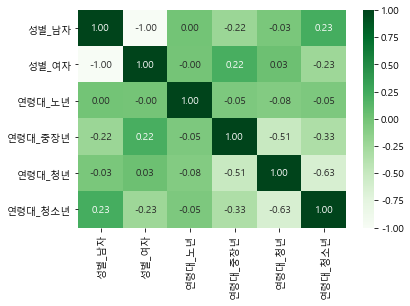

In [38]:
# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
sns.heatmap(demodp.corr(),
           annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

In [39]:
# r=-1.000 ~ r=-0.600  높은 음의 상관관계
# r=-0.599 ~ r=-0.400  중간 음의 상관관계
# r=-3.999 ~ r=-0.200  낮은 음의 상관관계
# r=-0.199 ~ r=+0.199  무상관
# r=+0.200 ~ r=+0.399  낮은 양의 상관관계
# r=+0.400 ~ r=+0.599  중간 양의 상관관계
# r=+0.600 ~ r=+1.000  높은 양의 상관관계

#### 켄달

In [40]:
import scipy.stats as stats

# kendall
stats.kendalltau(data['성별'], data['연령대'])

KendalltauResult(correlation=-0.12565960604844612, pvalue=0.008964949158919468)

#### 스피어만

In [41]:
# spearman
stats.spearmanr(data['성별'], data['연령대'])

SpearmanrResult(correlation=-0.13336389211068578, pvalue=0.008793155885581504)

#### 켄달

In [42]:
corr = final_data.corr(method='kendall')

In [43]:
corr

,기온,강수량,습도,기압,전운량,불고기,냉면,칼국수,된장찌개,비빔밥,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
기온,1.000000,-0.270041,-0.568114,0.111622,-0.361074,0.013722,0.090288,-0.012427,-0.088169,-0.015451,...,0.048327,0.005949,-0.074478,-0.036772,-0.075643,-0.011622,-0.069937,-0.051642,-0.076721,0.058248
강수량,-0.270041,1.000000,0.620726,-0.693947,0.677909,-0.008203,0.013068,0.085603,0.079697,0.013495,...,-0.002204,0.110563,0.088362,-0.024601,0.063569,0.009104,0.042913,0.048090,0.111060,0.101660
습도,-0.568114,0.620726,1.000000,-0.503063,0.649097,0.010369,-0.053804,0.062205,0.054327,0.023337,...,-0.051237,0.091420,0.070718,-0.018404,0.077582,0.001870,0.053387,0.031422,0.114933,0.054959
기압,0.111622,-0.693947,-0.503063,1.000000,-0.637729,0.013945,0.004742,-0.042447,-0.035856,-0.014228,...,0.030831,-0.082304,-0.050759,0.068854,-0.001857,0.022440,-0.001586,-0.017823,-0.081711,-0.110725
전운량,-0.361074,0.677909,0.649097,-0.637729,1.000000,-0.012535,-0.024741,0.057728,0.114455,-0.027019,...,-0.060635,0.063707,0.066827,0.022266,0.046091,-0.016677,0.072804,0.074692,0.123074,0.077088
불고기,0.013722,-0.008203,0.010369,0.013945,-0.012535,1.000000,0.099541,0.016762,0.085774,0.048192,...,-0.031050,0.052661,0.064722,-0.009927,0.072418,-0.027966,0.107612,0.015068,0.001011,-0.085747
냉면,0.090288,0.013068,-0.053804,0.004742,-0.024741,0.099541,1.000000,0.220034,0.073909,-0.006469,...,0.082120,0.035130,0.042727,0.123600,0.102042,0.199986,0.059794,-0.036334,-0.085728,-0.036416
칼국수,-0.012427,0.085603,0.062205,-0.042447,0.057728,0.016762,0.220034,1.000000,0.079228,0.106863,...,0.089388,0.074775,0.022412,0.053456,0.172077,0.119610,0.047790,0.020681,-0.053211,0.002969
된장찌개,-0.088169,0.079697,0.054327,-0.035856,0.114455,0.085774,0.073909,0.079228,1.000000,0.048051,...,-0.011870,0.040317,-0.033725,0.010521,0.131591,-0.015502,-0.035608,0.007472,-0.098580,-0.026546
비빔밥,-0.015451,0.013495,0.023337,-0.014228,-0.027019,0.048192,-0.006469,0.106863,0.048051,1.000000,...,-0.026541,0.005995,-0.056392,-0.002582,0.019549,0.014954,-0.023200,0.007245,-0.043753,-0.058882


<AxesSubplot:>

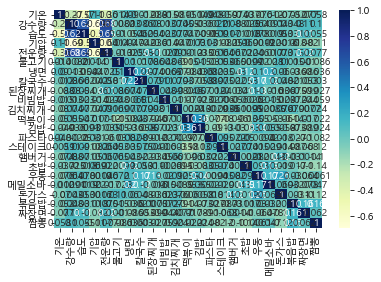

In [44]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)

#### 스피어만

In [45]:
corr2 = final_data.corr(method='spearman')

<AxesSubplot:>

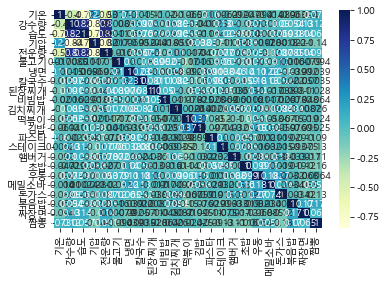

In [46]:
sns.heatmap(corr2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)